In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

random_state = 67
np.random.seed(random_state)
cv_splits = StratifiedKFold(n_splits=3,shuffle=True,random_state=random_state)


# 1.
Load the file pollution.csv, explore the data showing size and synthetic information

In [6]:
url = 'pollution.csv'
df0 = pd.read_csv(url)
df0.shape

(9357, 15)

In [9]:
print(f'the data frame has {df0.shape[0]} sample, each with {df0.shape[1]} feature');

the data frame has 9357 sample, each with 15 feature


In [10]:
# Display the first 5 samples
df0.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150.0,11.9,1046,166.0,1056,113.0,1692,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112.0,9.4,955,103.0,1174,92.0,1559,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88.0,9.0,939,131.0,1140,NaN,1555,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80.0,9.2,948,172.0,1092,122.0,1584,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51.0,6.5,836,131.0,1205,116.0,1490,1110.0,11.2,59.6,0.7888


In [11]:
df0.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8410.000000,9357.000000,8444.000000,9357.000000,9357.000000,8410.000000,9357.000000,8436.000000,9357.000000,8363.000000,9357.000000,9357.000000,9357.000000
mean,-33.896647,1048.990061,-159.377901,1.865683,894.595276,170.595838,794.990168,58.272285,1391.479641,977.107019,9.778305,39.485380,-6.837604
std,77.405958,329.832710,139.919370,41.380206,342.333252,258.820216,321.993552,126.636644,467.210125,456.737454,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,51.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,142.000000,794.000000,96.000000,1446.000000,943.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,286.000000,960.000000,133.000000,1662.000000,1254.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2522.000000,44.600000,88.700000,2.231000


from this description we see that there are several missing values, by checking the "count" attribute.
we also see that the standad deviation for the features is very different raging from 43 to 467

In [14]:
print(f'number of null values for each features: \n{df0.isna().sum()}')

number of null values for each features: 
Date               0
Time               0
CO(GT)           947
PT08.S1(CO)        0
NMHC(GT)         913
C6H6(GT)           0
PT08.S2(NMHC)      0
NOx(GT)          947
PT08.S3(NOx)       0
NO2(GT)          921
PT08.S4(NO2)       0
PT08.S5(O3)      994
T                  0
RH                 0
AH                 0
dtype: int64


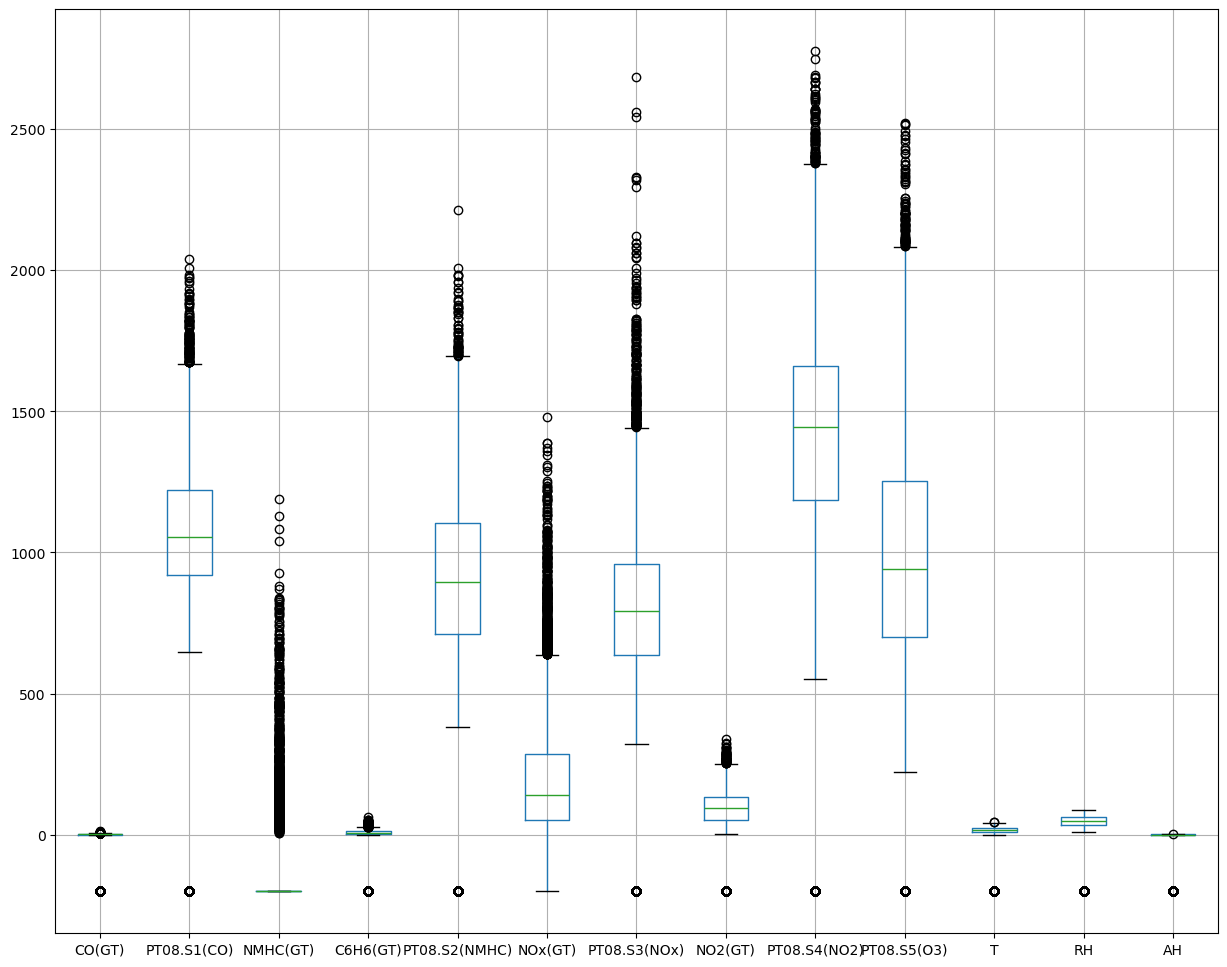

In [15]:
df0.boxplot(figsize=(15,12))
plt.show()

with this box plot we can see that the feature have very differente range ant there are several outlier

---

# 2. 
- keep only the columns ’Date’,’Time’,’CO(GT)’,’NOx(GT)’,’PT08.S5(O3)’,’NMHC(GT)’,’NO2(GT)’,’C6H6(GT)’
- then drop all the rows containing null values
- and substitute the columns ’Date’,’Time’ with a new column ’DateTime’ obtained encoding the two strings ; you can do this using the to_datetime method of pandas with an appropriate format string;
-  use as target ’C6H6(GT)’
-  and use for the prediction the other five numeric columns; the ’DateTime’; the
 date will not be used for the prediction, but only for the presentation
 of the results, as required below

In [16]:
df0.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150.0,11.9,1046,166.0,1056,113.0,1692,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112.0,9.4,955,103.0,1174,92.0,1559,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88.0,9.0,939,131.0,1140,NaN,1555,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80.0,9.2,948,172.0,1092,122.0,1584,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51.0,6.5,836,131.0,1205,116.0,1490,1110.0,11.2,59.6,0.7888


In [19]:
#keep only the columns ’Date’,’Time’,’CO(GT)’,’NOx(GT)’,’PT08.S5(O3)’,’NMHC(GT)’,’NO2(GT)’,’C6H6(GT)’
df1 = df0.drop(['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','T','RH','AH'],axis=1)
df1.head()

,Date,Time,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),PT08.S5(O3)
0,2004-03-10,18:00:00,2.6,150.0,11.9,166.0,113.0,1268.0
1,2004-03-10,19:00:00,2.0,112.0,9.4,103.0,92.0,972.0
2,2004-03-10,20:00:00,2.2,88.0,9.0,131.0,NaN,1074.0
3,2004-03-10,21:00:00,2.2,80.0,9.2,172.0,122.0,1203.0
4,2004-03-10,22:00:00,1.6,51.0,6.5,131.0,116.0,1110.0


In [20]:
#then drop all the rows containing null values
df2 = df1.dropna()
print(f'number of null values for each features: \n{df2.isna().sum()}')

number of null values for each features: 
Date           0
Time           0
CO(GT)         0
NMHC(GT)       0
C6H6(GT)       0
NOx(GT)        0
NO2(GT)        0
PT08.S5(O3)    0
dtype: int64


In [23]:
pd.to_datetime("2018-10-26 12:00:00", format="%Y-%m-%d %H:%M:%S")
#list('{} {}'.format(df2['Date'].to_string(),df2['Time'].to_string()))

Timestamp('2018-10-26 12:00:00')

In [43]:
# and substitute the columns ’Date’,’Time’ with a new column ’DateTime’ obtained encoding the two strings ; 
# you can do this using the to_datetime method of pandas with an appropriate format string;

# Add 'DateTime' feature
df3 = df2.copy()
df3['DateTime'] = pd.to_datetime(df2['Date'].values +' '+ df2['Time'].values, format="%Y-%m-%d %H:%M:%S")
df3 = df3.drop(['Date','Time'],axis=1)
df3.head()


,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),PT08.S5(O3),DateTime
0,2.6,150.0,11.9,166.0,113.0,1268.0,2004-03-10 18:00:00
1,2.0,112.0,9.4,103.0,92.0,972.0,2004-03-10 19:00:00
3,2.2,80.0,9.2,172.0,122.0,1203.0,2004-03-10 21:00:00
4,1.6,51.0,6.5,131.0,116.0,1110.0,2004-03-10 22:00:00
9,0.6,19.0,1.7,-200.0,-200.0,501.0,2004-03-11 03:00:00


In [44]:
# use as target ’C6H6(GT)
target = 'C6H6(GT)'
y = df3[target]

y.shape

(5488,)

In [85]:
# and use for the prediction the other five numeric columns; the ’DateTime’; the
# date will not be used for the prediction, but only for the presentation of the results, as required below

from sklearn.model_selection import train_test_split
# because there are 5488 sample i choose 0.75 for the training set instead of 0.67
X = df3.drop([target],axis=1)
X_train_with_datetime,X_test_with_datetime,y_train,y_test = train_test_split(X,y,random_state=random_state,train_size=0.75)

X_train = X_train_with_datetime.drop('DateTime',axis=1)
X_test = X_test_with_datetime.drop('DateTime',axis=1)

print(f'there are {X_train.shape[0]} samples in the training set')
print(f'there are {X_test.shape[0]} samples in the test set')

there are 4116 samples in the training set
there are 1372 samples in the test set


#  3.
fit a linear regression model on the training data, evaluate RMSE and R–square on the training and on the test data, show the values .

In [49]:
results = pd.DataFrame([],columns=['Model','Set','RMSE','R2-score'])

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

##
coeff = lr.coef_
intercept = lr.intercept_ 

##
results.loc[len(results)] = [
    'Linear Regression Multivariate',
    'train_set',
    root_mean_squared_error(y_train,y_pred_train),
    r2_score(y_train,y_pred_train)
]
results.loc[len(results)] = [
    'Linear Regression Multivariate',
    'test_set',
    root_mean_squared_error(y_test,y_pred_test),
    r2_score(y_test,y_pred_test)
]

In [56]:
display(results)

,Model,Set,RMSE,R2-score
0,Linear Regression Multivariate,train_set,27.111671,0.569937
1,Linear Regression Multivariate,test_set,29.519821,0.547312


the model has slitly-better performance in the training se rather than the test sets

###  4. plot the true and the predicted target values for the test set, using for the x axis the ’Date’ column

In [88]:
# to have a nice plot we must sort the values by incrising DateTime
plot_df = pd.DataFrame([])
plot_df['DateTime'] = X_test_with_datetime['DateTime']
plot_df['true_values'] = y_test
plot_df['pred_values'] = y_pred_test
plot_df_sorted = plot_df.sort_values(by='DateTime')
plot_df_sorted.head()


,DateTime,true_values,pred_values
4,2004-03-10 22:00:00,6.5,17.477581
12,2004-03-11 06:00:00,1.6,-28.615010
18,2004-03-11 12:00:00,5.2,-18.098891
19,2004-03-11 13:00:00,7.3,-10.322462
26,2004-03-11 20:00:00,24.0,31.370809


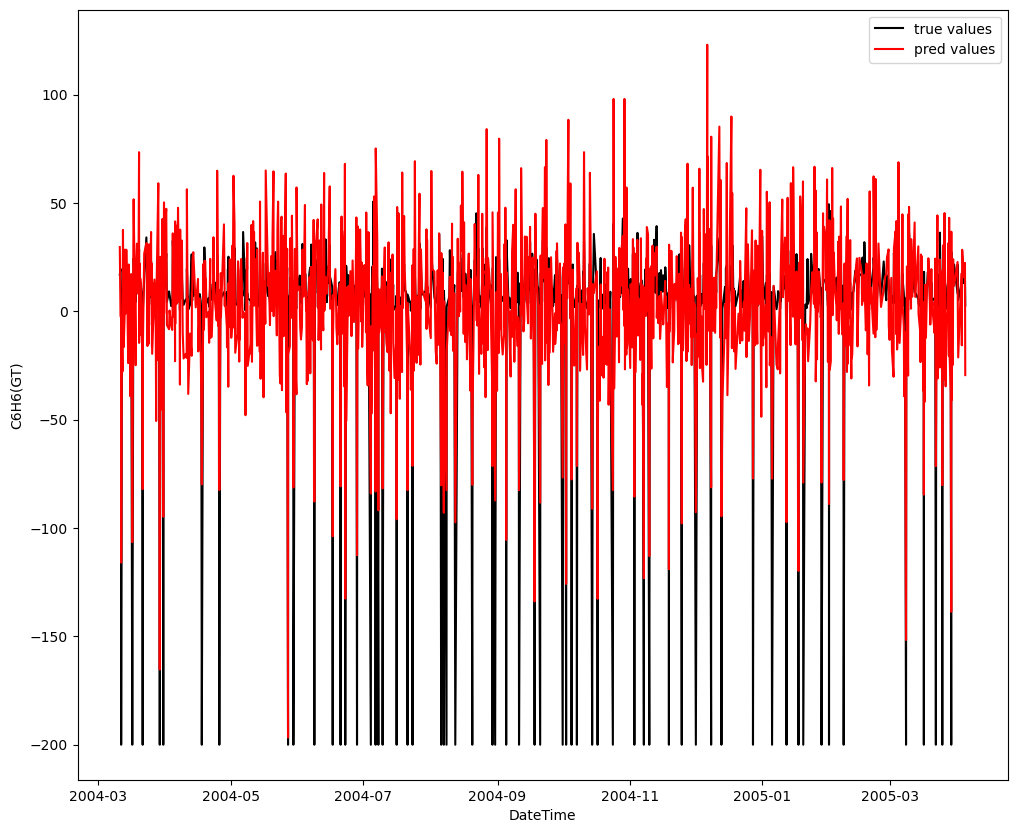

In [95]:
plt.figure(figsize=(12,10))
plt.plot(plot_df_sorted['DateTime'],plot_df['true_values'],color='black',label='true values')
plt.plot(plot_df_sorted['DateTime'],plot_df['pred_values'],color='red',label='pred values')
plt.ylabel(target)
plt.xlabel('DateTime')
plt.legend()
plt.show()

###  5. fit a polynomial regression model trying several maximum degrees, up to 4, optimising the model with cross validation evaluate RMSE and R–square on the training and on the test data, show the optimal degree of the polynomial and the results

--- 
Warning: I get -1 point because i forgot to use cross validation

---

In [100]:
from sklearn.preprocessing import PolynomialFeatures

degrees = [*range(2,5)]
y_preds_poly = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    lr = LinearRegression()
    lr.fit(X_train_poly,y_train)
    y_pred_train_poly = lr.predict(X_train_poly)
    y_pred_test_poly = lr.predict(X_test_poly)

    y_preds_poly.append(y_pred_test_poly)
    
    results.loc[len(results)] = [
    f'Polinomial Degree:{degree}',
    'train_set',
    root_mean_squared_error(y_train,y_pred_train_poly),
    r2_score(y_train,y_pred_train_poly)
    ]
    results.loc[len(results)] = [
        f'Polinomial Degree:{degree}',
        'test_set',
        root_mean_squared_error(y_test,y_pred_test_poly),
        r2_score(y_test,y_pred_test_poly)
    ]

In [99]:
display(results.sort_values(by='RMSE'))

,Model,Set,RMSE,R2-score
6,Polinomial Degree:4,train_set,3.537818,0.992677
7,Polinomial Degree:4,test_set,5.920910,0.981788
4,Polinomial Degree:3,train_set,7.423858,0.967754
5,Polinomial Degree:3,test_set,8.805453,0.959721
2,Polinomial Degree:2,train_set,15.276226,0.863462
3,Polinomial Degree:2,test_set,16.824997,0.852944
0,Linear Regression Multivariate,train_set,27.111671,0.569937
1,Linear Regression Multivariate,test_set,29.519821,0.547312


###  6. plot the true and the predicted target values for the test set, using for the x axis the ’Date’ column

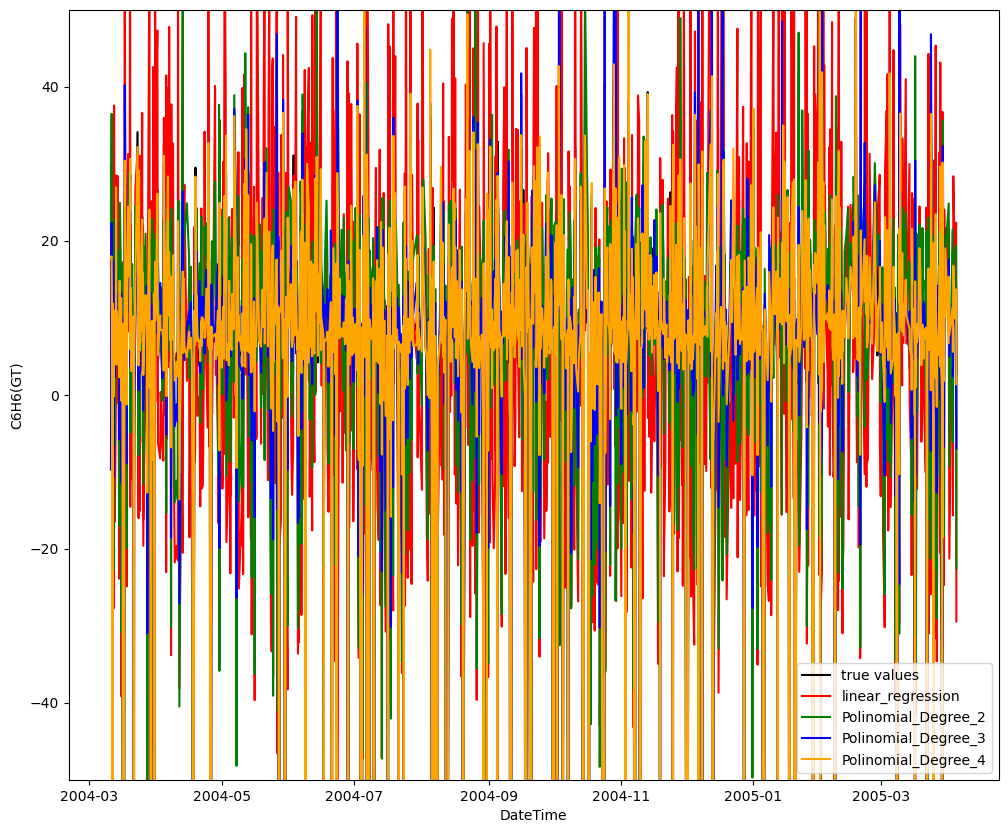

In [103]:
plot_df = pd.DataFrame([])
plot_df['DateTime'] = X_test_with_datetime['DateTime']
plot_df['true_values'] = y_test
plot_df['linear_regression'] = y_pred_test
plot_df['Polinomial_Degree_2'] = y_preds_poly[0]
plot_df['Polinomial_Degree_3'] = y_preds_poly[1]
plot_df['Polinomial_Degree_4'] = y_preds_poly[2]
plot_df_sorted = plot_df.sort_values(by='DateTime')
plot_df_sorted.head()

plt.figure(figsize=(12,10))
plt.plot(plot_df_sorted['DateTime'],plot_df['true_values'],color='black',label='true values')
plt.plot(plot_df_sorted['DateTime'],plot_df['linear_regression'],color='red',label='linear_regression')
plt.plot(plot_df_sorted['DateTime'],plot_df['Polinomial_Degree_2'],color='green',label='Polinomial_Degree_2')
plt.plot(plot_df_sorted['DateTime'],plot_df['Polinomial_Degree_3'],color='blue',label='Polinomial_Degree_3')
plt.plot(plot_df_sorted['DateTime'],plot_df['Polinomial_Degree_4'],color='orange',label='Polinomial_Degree_4')
plt.ylabel(target)
plt.xlabel('DateTime')
plt.legend()
plt.ylim(-50,50)
plt.show()

### 7. comment the results of the two models

--- 
Warning: I made i mistake in this response. R2_score near 1 is actually good. But they don't deduct me point probably because the comment on the overfitting was right

---

all the models has better RMSE in the training set rather then the test set. but this is normal because each model always try 
to fit the data. the problem is when there is an overfittig. in this case we can see that for exemple the Polinomial_degree 4 has the
lowest RMSE but has the highest R2_score, that means that the models has overfitted the data. infact the error difference between the 
test set and the training set is nearly the double.
on the other end the normal linear regression has a great RMSE meaning that the model is Underfitting